**Importing some useful packages**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

**Importing/loading the data**

In [15]:
haberman = pd.read_csv("/content/haberman.csv")

In [16]:
print(haberman.shape)

(305, 4)


**Insights**

* Number of Instances: 306
* Number of Attributes: 4 


In [17]:
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Since the attributes names are in the form of numerical & lets give names to the attributes

In [22]:
haberman = pd.read_csv("/content/haberman.csv", header=None, names=["age","op_year","axil_nodes","surv_status"])

In [23]:
haberman.head()

,age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Attribute Information:

1-Age of patient at time of operation (numerical)

2-Patient's year of operation (year - 1900, numerical)

3-Number of positive axillary nodes detected (numerical)

4-Survival status (class attribute) 
   * 1 = the patient survived 5 years or longer 
   * 2 = the patient died within 5 year

In [24]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Insights**

1. Shape of data is 306 rows and 4 columns
2. Columns are age, op_year,axil_nodes,surv_status
3. From information of data,all elements are non-null and int values. So, There is no missing values in our data set

In [25]:
print(haberman.surv_status.unique())

[1 2]


In [62]:
# how many patients survived over 5 years and more and how many died within 5years?
haberman["surv_status"].value_counts()

yes    225
no      81
Name: surv_status, dtype: int64

Observation:

1. Following dataset is an unbalanced dataset 
2. Out of 306 operation performed-
    
    225 people lived more than 5 years and
    
    81 people died less than 5 years.

In [26]:
# Let's modify the dependant variable(target column) to be categorical/meaningful
haberman.surv_status = haberman.surv_status.map({1:"yes",2:"no"}).astype("category")

In [27]:
# Some high level statistics
print(haberman.describe())

              age     op_year  axil_nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


Observation:

1. The Age of the patients vary from 30 to 83 with the median of 52.
2. Although the maximum number of axil_nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes

In [29]:
print(haberman.shape[0])
print(haberman.shape[1])

306
4


In [33]:
print(haberman.surv_status.value_counts(normalize=True))

yes    0.735294
no     0.264706
Name: surv_status, dtype: float64


**Insights**

* The age of the patients vary from 30 to 83 with the median of 52.
* The number of detected nodes vary from 0 to 52 (probably an outlier) with the median of 1 and mean of 4.
* 75% of data points have less than 5 detected axilary nodes and nearly 25% have no detected nodes
* The target column is unbalanced with 73% yes- 26% no



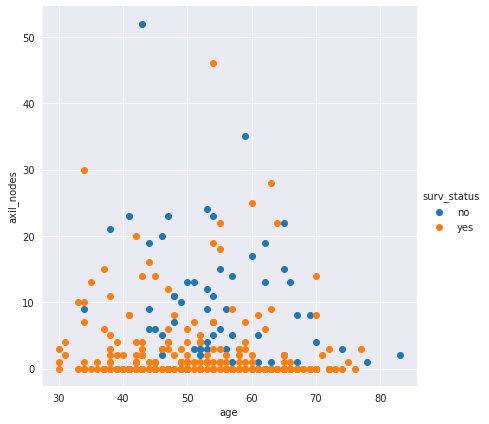

In [36]:
# Let's visualize some 2D Scatter plots with color coding for each class
sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="surv_status",height=6).map(plt.scatter,"age","axil_nodes").add_legend()
plt.show()


Some observations: as the number of positive axillary nodes detected increases, there are more people who die within 5 years than people who survived. On the opposite we notice that people who survived generally had few axilary detected nodes

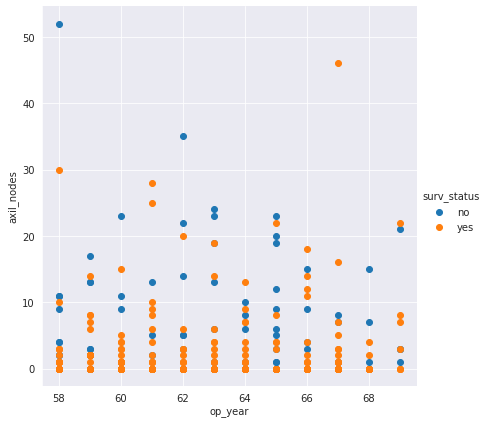

In [39]:
sns.FacetGrid(haberman,hue = "surv_status", height = 6).map(plt.scatter,"op_year","axil_nodes").add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


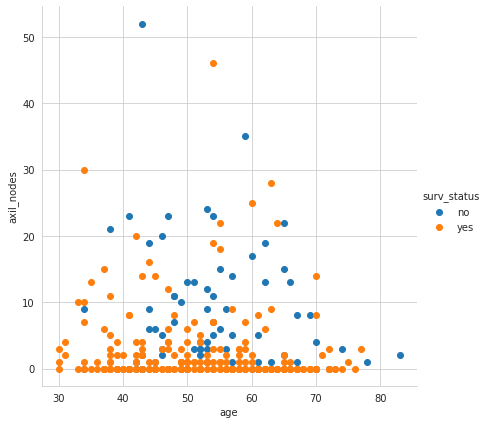

In [64]:
# 2-D Scatter plot with color-coding for each survival status type/class.
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();

Observations:

* It seems most of the patients have 0 axil_nodes detected.
Here we clearly see that blue points are not seperated from orange points.So, by looking this 2-D scatter plot between 'age' and 'axil_nodes' we cannot make any decision regarding patient's survival.
* Therefore, we have to check all combination/pair of features to make good classification/decision.
Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'Survival')
Now, for these combination to analyse,Pair-Plot concept is used.


**Pair Plot**

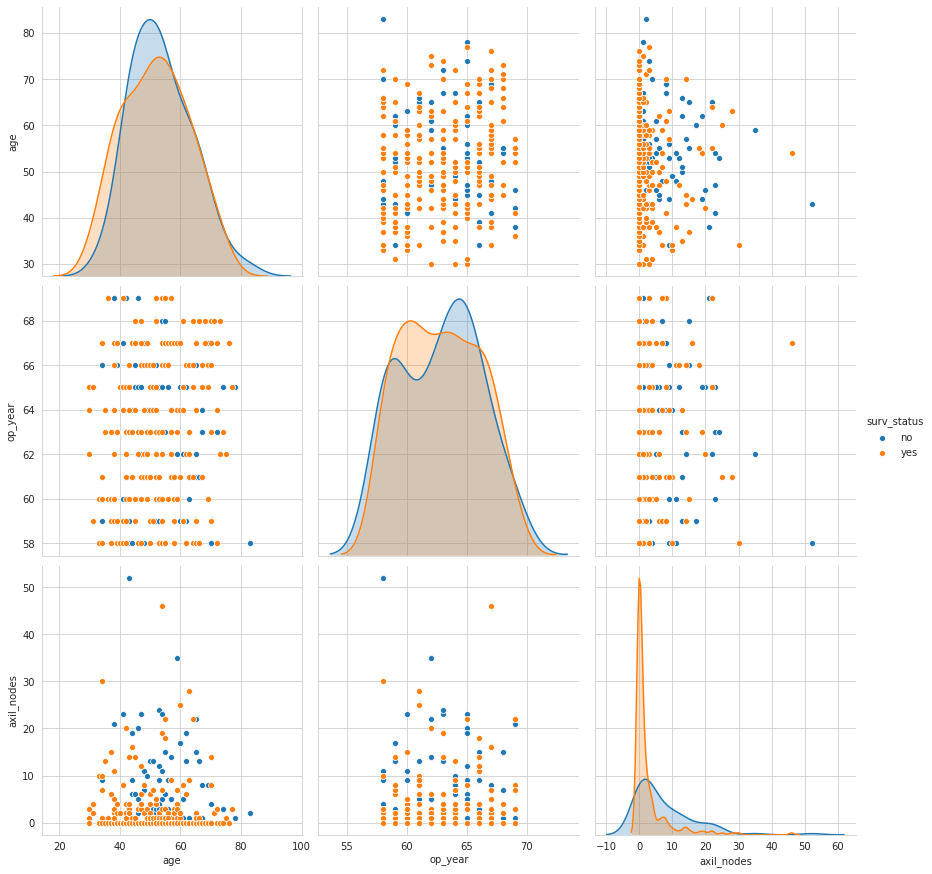

In [40]:
# For more 2D-Plot insights let's draw our pair plot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue = "surv_status",height = 4)
plt.show()

* The number of detected axilary nodes are the most useful features to identify our target variable value.

* There is a lot of overlap between the two classes which can not be simply separated.

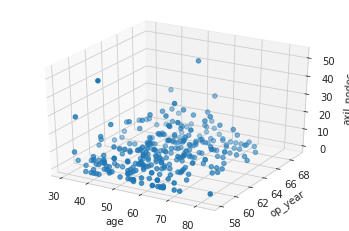

In [69]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

    
xs = haberman["age"]
ys = haberman["op_year"]
zs = haberman["axil_nodes"]    

ax.scatter(xs, ys, zs)

ax.set_xlabel('age')
ax.set_ylabel('op_year')
ax.set_zlabel('axil_nodes')

plt.show()


**Univariate analysis using hsitograms, PDF and CDF**

1 - Univariate analysis on Two separated dataframes

In [43]:
# Let's split our dataframe inti two dataframes
yes_df = haberman[haberman.surv_status == "yes"] 
no_df = haberman[haberman.surv_status == "no"]

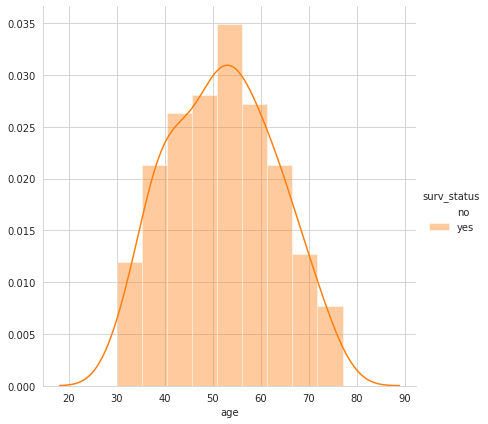

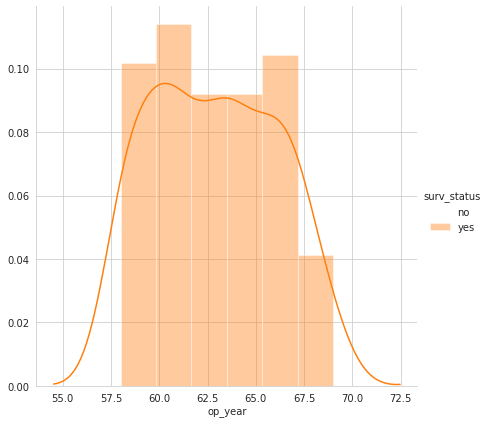

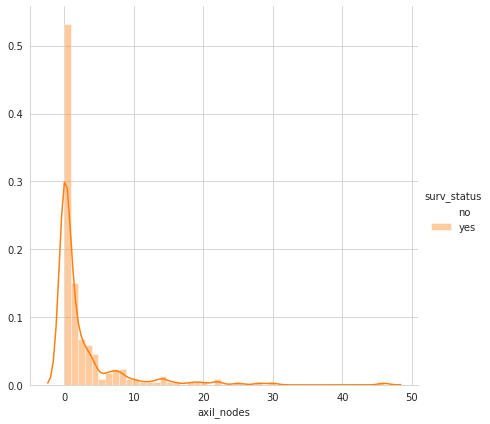

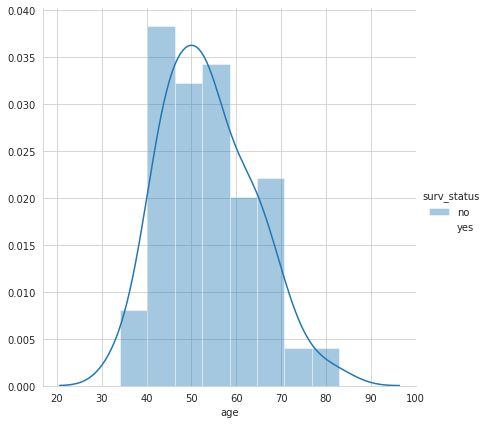

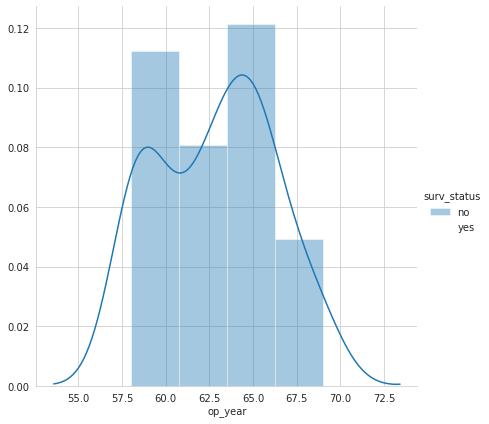

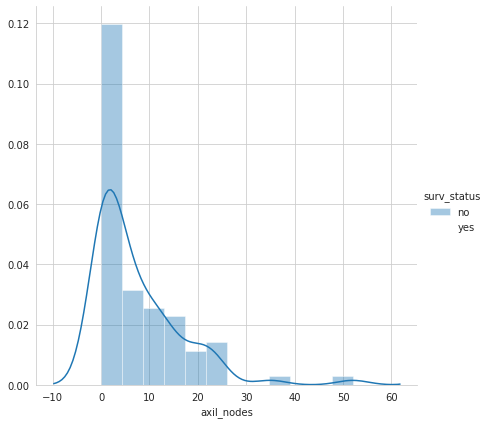

In [44]:
for dataF in [yes_df,no_df]:
    for column in haberman.columns[:-1]:
        sns.FacetGrid(dataF,hue="surv_status",height = 6).map(sns.distplot,column).add_legend()
        plt.show()


Observation:

* From the above PDFs(Univariate analysis) both age and op_year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.

* axil_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero axil_nodes.

* From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1965


2 - Univariate analysis on The whole data se

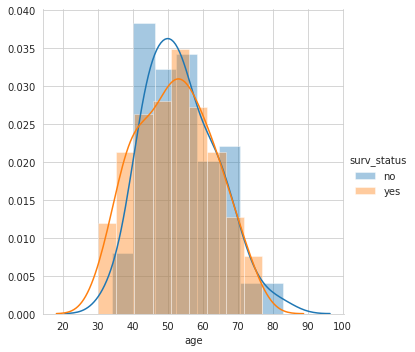

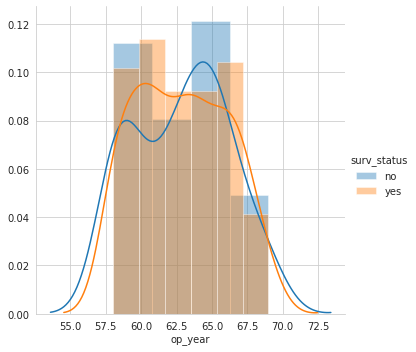

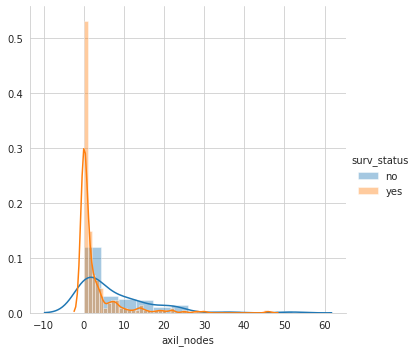

In [45]:
for column in haberman.columns[:-1]:
    sns.FacetGrid(haberman,hue="surv_status",height=5).map(sns.distplot,column).add_legend()
    plt.show()

**PDFs and CDFs visualizations**

Univariate PDFs/CDFs on the whole Data set

PDF and CDF of  age  variable.
PDF:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bins_Edges:  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


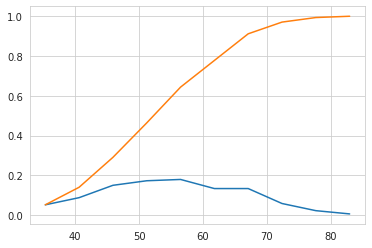

********************************end*************************************
PDF and CDF of  op_year  variable.
PDF:  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
Bins_Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


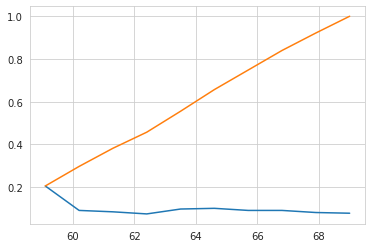

********************************end*************************************
PDF and CDF of  axil_nodes  variable.
PDF:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bins_Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


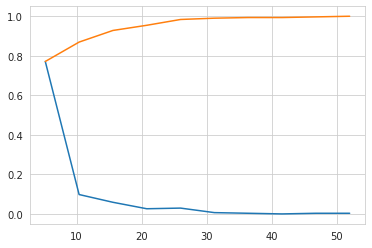

********************************end*************************************


In [48]:
for column in haberman.columns[:-1]:
    counts, bins_edges = np.histogram(haberman[column],bins=10,density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    print("PDF and CDF of ",column," variable.")
    print("PDF: ",pdf)
    print("Bins_Edges: ",bins_edges)
    plt.plot(bins_edges[1:],pdf)
    plt.plot(bins_edges[1:],cdf)
    plt.show()
    print("********************************end*************************************")

Univariate PDFs/CDFs on the yes/no datasets(split in two data sets)

PDF and CDF of  age  variable In DataFrame: yes _DF
PDF:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bins_Edges:  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


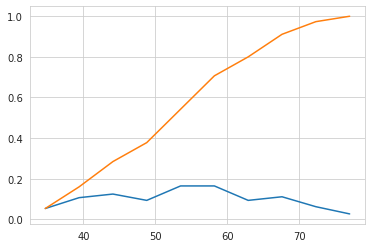

*****************************end*********************************
PDF and CDF of  op_year  variable In DataFrame: yes _DF
PDF:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bins_Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


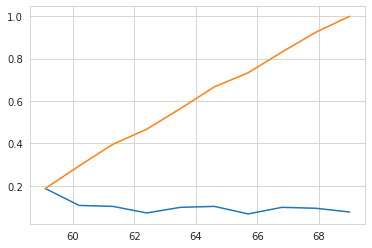

*****************************end*********************************
PDF and CDF of  axil_nodes  variable In DataFrame: yes _DF
PDF:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bins_Edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


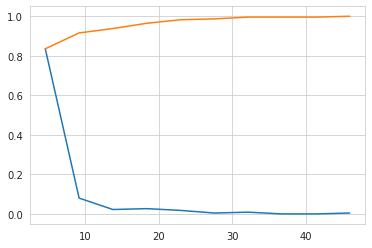

*****************************end*********************************
------------------------------------------------------
PDF and CDF of  age  variable In DataFrame: no _DF
PDF:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bins_Edges:  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


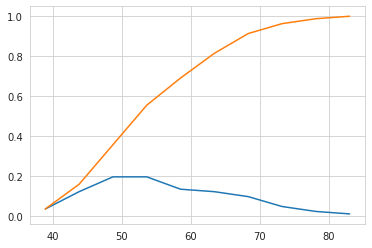

*****************************end*********************************
PDF and CDF of  op_year  variable In DataFrame: no _DF
PDF:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bins_Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


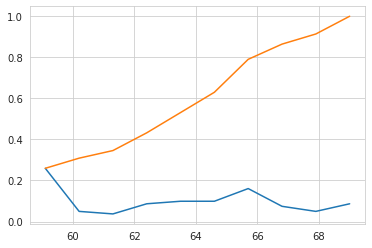

*****************************end*********************************
PDF and CDF of  axil_nodes  variable In DataFrame: no _DF
PDF:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bins_Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


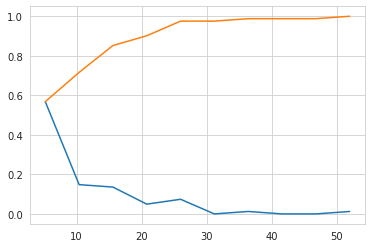

*****************************end*********************************
------------------------------------------------------


In [49]:
for dataF in [yes_df,no_df]:
    for column in haberman.columns[:-1]:
        counts, bins_edges = np.histogram(dataF[column],bins=10,density=True)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        print("PDF and CDF of ",column," variable In DataFrame:",dataF.surv_status.iloc[0],"_DF")
        print("PDF: ",pdf)
        print("Bins_Edges: ",bins_edges)
        plt.plot(bins_edges[1:],pdf)
        plt.plot(bins_edges[1:],cdf)
        plt.show()
        print("*****************************end*********************************")
    print("------------------------------------------------------")

**statistics on "age" and "axil_nodes" variables (mean, std, percentiles, median, IDR, MAD, Quantiles)**

In [72]:
print("Summary Statistics of Patients who are alive for more than 5 years:")
yes_df.describe()

Summary Statistics of Patients who are alive for more than 5 years:


,age,op_year,axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [73]:
print("Summary Statistics of Patients who are dead within 5 years:")
no_df.describe()

Summary Statistics of Patients who are dead within 5 years:


,age,op_year,axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000



Observations:

From both the tables we can observe that almost for all the features the statistics are similar except for axil_nodes.

The mean(average) of axil_nodes is more for people who died within 5 years than people who have survived for more than 5 years

From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of axil_nodes have survived.


**Median, Percentile, Quantile, IQR, MAD**

In [76]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(yes_df["axil_nodes"]))
#Median with an outlier
print(np.median(np.append(yes_df["axil_nodes"],50)));
print(np.median(no_df["axil_nodes"]))

print("\nQuantiles:")
print(np.percentile(yes_df["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(no_df["axil_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(yes_df["axil_nodes"],90))
print(np.percentile(no_df["axil_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(yes_df["axil_nodes"]))
print(robust.mad(no_df["axil_nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Observations:

* From both the tables we can observe that almost for all the features the statistics are similar except for axil_nodes.

* The mean(average) of axil_nodes is more for people who died within 5 years than people who have survived for more than 5 years

* From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of axil_nodes have survived.


**Box plots**

<function matplotlib.pyplot.show>

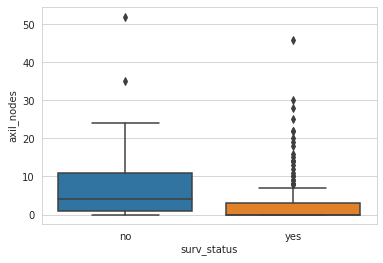

In [53]:
sns.boxplot(x="surv_status",y="axil_nodes",data=haberman)
plt.show

<function matplotlib.pyplot.show>

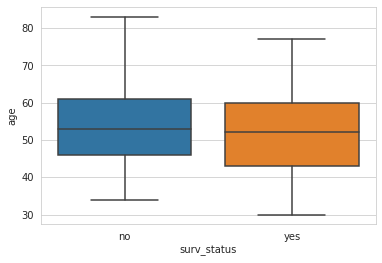

In [54]:
sns.boxplot(x="surv_status",y="age",data=haberman)
plt.show

**Violin plots**

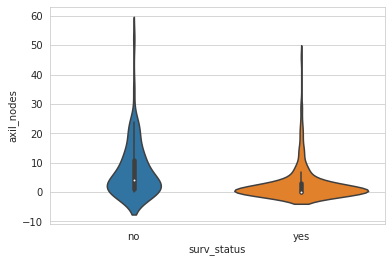

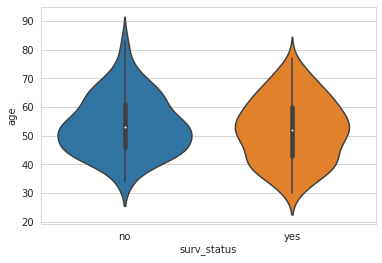

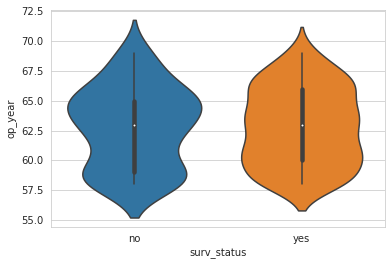

In [56]:
sns.violinplot(x="surv_status",y="axil_nodes",data=haberman,height=8)
plt.show()
sns.violinplot(x="surv_status",y="age",data=haberman,height=8)
plt.show()
sns.violinplot(x="surv_status",y="op_year",data=haberman,height=8)
plt.show()

Observation:

* The number of axil_nodes of the survivors is highly densed from 0 to 5.
* Almost 80% of the patients have less than or equal to 5 axil_nodes survived more than 5 years.
* From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

Multivariate Contour Probability density

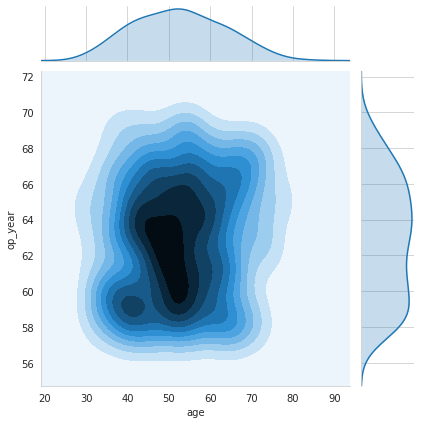

In [77]:
sns.jointplot(x="age", y="op_year", data=haberman, kind="kde");
plt.show()


Observation: There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60

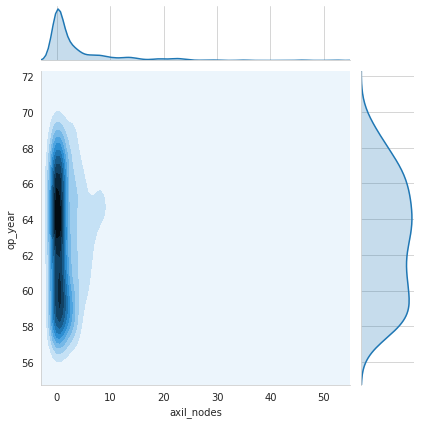

In [59]:
sns.jointplot(x="axil_nodes",y="op_year",data=haberman,kind = "kde")
plt.show()

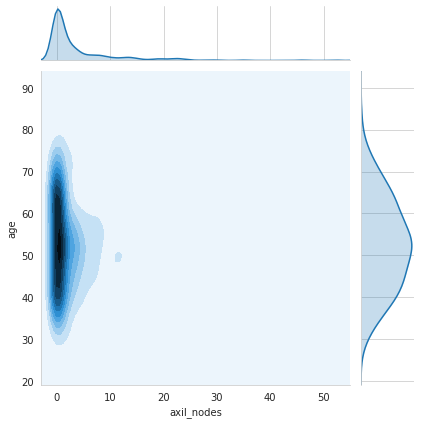

In [58]:
sns.jointplot(x="axil_nodes",y="age",data=haberman,kind = "kde")
plt.show()

Final Observations and conclusions:

* The variable "number of detected nodes" is the best one to help us separate and differentiate the two classes

* Except for the year 65 (+- 1 year), the chances of surviving are greater than before year 1960

* People who survived had their ages mainly between 45 to 55 years old.